<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/sobes_zadanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

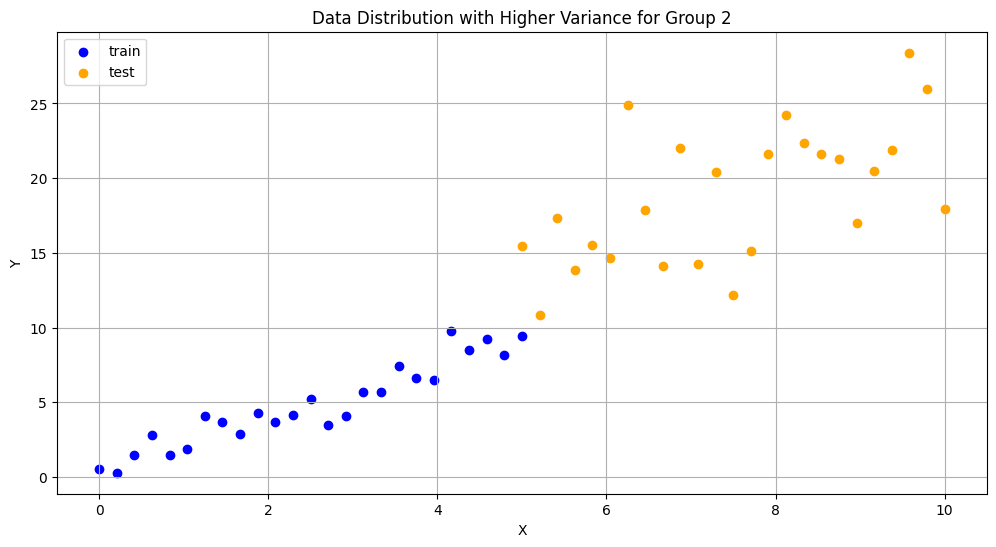

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Генерация данных с большей дисперсией
np.random.seed(42)

# Первая группа данных (синяя, без изменений)
X_train = np.linspace(0, 5, 25)
y_train = 2 * X_train + np.random.normal(0, 1, len(X_train))

# # Вторая группа данных (оранжевая, с увеличенной дисперсией)
# X_test = np.linspace(5, 10, 25)
# y_test = 2 * X_test + 5 + np.random.normal(0, 3, len(X_test))  # Стандартное отклонение увеличено до 3
# Вторая группа данных (оранжевая, с увеличенной дисперсией)
X_test = np.linspace(5, 10, 25)
y_test = 2 * X_test +5 + np.random.normal(0, 4, len(X_test))  # Стандартное отклонение увеличено до 3


# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='train')
plt.scatter(X_test, y_test, color='orange', label='test')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.title("Data Distribution with Higher Variance for Group 2")
plt.show()



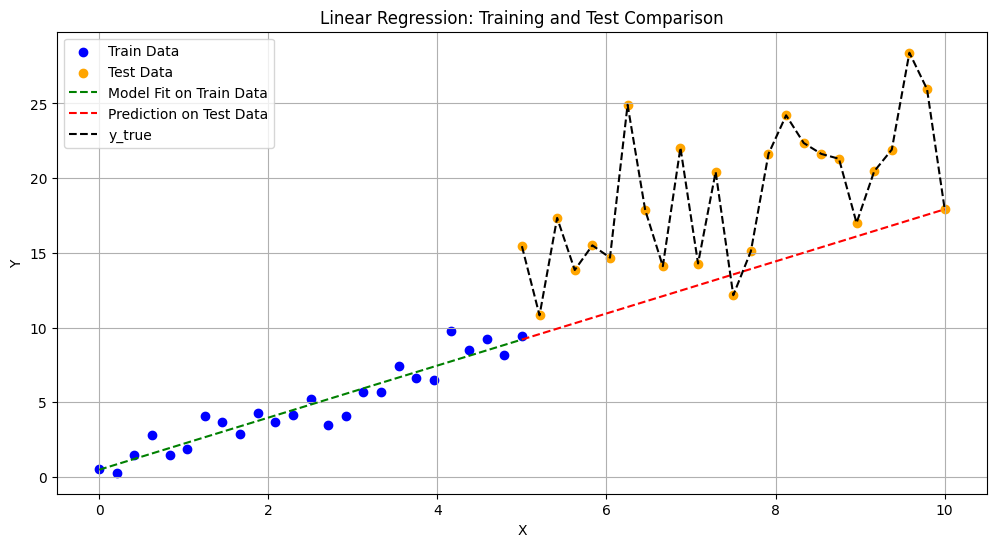

(array([1.74345118]), 0.47786399822638437)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Обучение линейной регрессии на train
model = LinearRegression()
X_train_reshaped = X_train.reshape(-1, 1)  # Преобразование в столбец для модели
model.fit(X_train_reshaped, y_train)

# Прогноз на train и test
X_test_reshaped = X_test.reshape(-1, 1)
y_train_pred = model.predict(X_train_reshaped)
y_test_pred = model.predict(X_test_reshaped)

# Визуализация результатов
plt.figure(figsize=(12, 6))

# Данные train и test
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')

# Линии прогноза
plt.plot(X_train, y_train_pred, color='green', label='Model Fit on Train Data', linestyle='--')
plt.plot(X_test, y_test_pred, color='red', label='Prediction on Test Data', linestyle='--')
plt.plot(X_test, y_test, color='black', label='y_true', linestyle='--')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression: Training and Test Comparison")
plt.legend()
plt.grid(True)
plt.show()

# Коэффициенты модели
model_coef = model.coef_
model_intercept = model.intercept_

model_coef, model_intercept


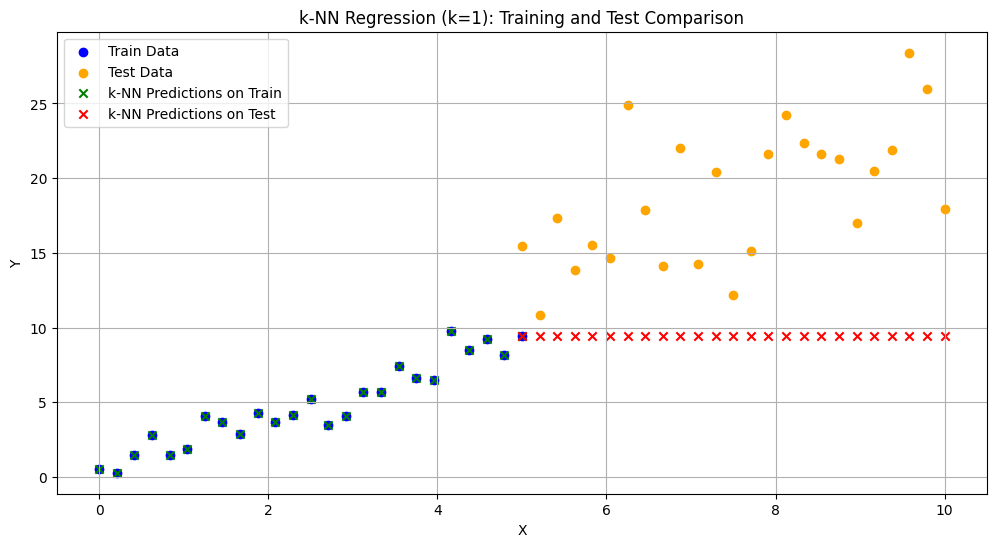

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Обучение k-NN с k=1 на train
knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train_reshaped, y_train)

# Прогноз на train и test
y_train_knn_pred = knn_model.predict(X_train_reshaped)
y_test_knn_pred = knn_model.predict(X_test_reshaped)

# Визуализация результатов
plt.figure(figsize=(12, 6))

# Данные train и test
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')

# Линии прогноза для k-NN
plt.scatter(X_train, y_train_knn_pred, color='green', label='k-NN Predictions on Train', marker='x')
plt.scatter(X_test, y_test_knn_pred, color='red', label='k-NN Predictions on Test', marker='x')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("k-NN Regression (k=1): Training and Test Comparison")
plt.legend()
plt.grid(True)
plt.show()


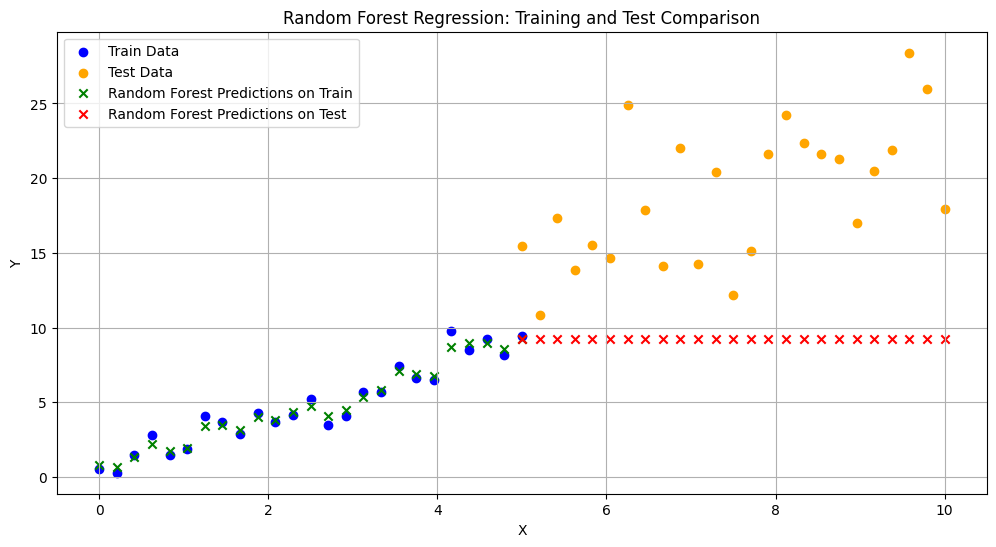

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Обучение Random Forest на train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_reshaped, y_train)

# Прогноз на train и test
y_train_rf_pred = rf_model.predict(X_train_reshaped)
y_test_rf_pred = rf_model.predict(X_test_reshaped)

# Визуализация результатов
plt.figure(figsize=(12, 6))

# Данные train и test
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')

# Прогнозы Random Forest
plt.scatter(X_train, y_train_rf_pred, color='green', label='Random Forest Predictions on Train', marker='x')
plt.scatter(X_test, y_test_rf_pred, color='red', label='Random Forest Predictions on Test', marker='x')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Random Forest Regression: Training and Test Comparison")
plt.legend()
plt.grid(True)
plt.show()


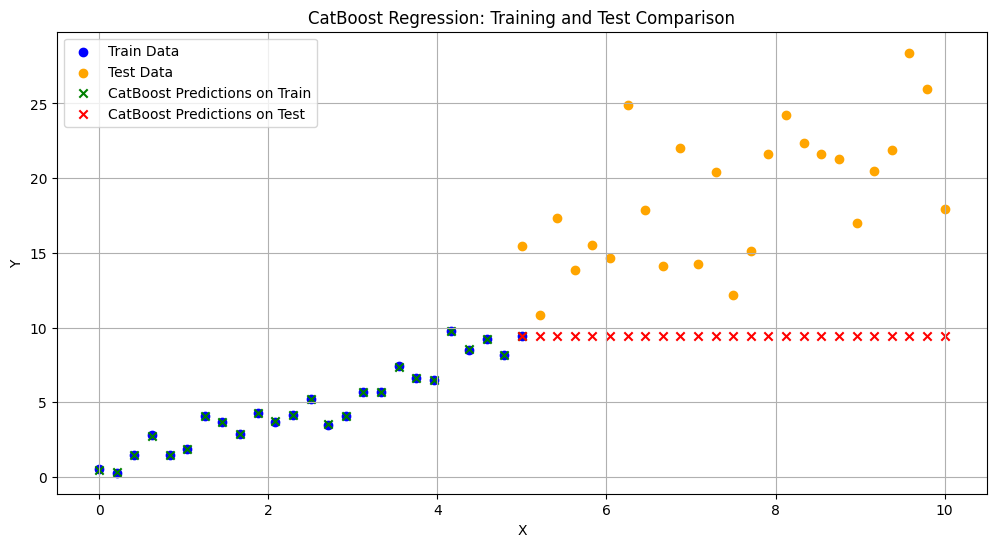

In [ ]:
from catboost import CatBoostRegressor

# Обучение CatBoost на train
catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
catboost_model.fit(X_train_reshaped, y_train)

# Прогноз на train и test
y_train_cb_pred = catboost_model.predict(X_train_reshaped)
y_test_cb_pred = catboost_model.predict(X_test_reshaped)

# Визуализация результатов
plt.figure(figsize=(12, 6))

# Данные train и test
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')

# Прогнозы CatBoost
plt.scatter(X_train, y_train_cb_pred, color='green', label='CatBoost Predictions on Train', marker='x')
plt.scatter(X_test, y_test_cb_pred, color='red', label='CatBoost Predictions on Test', marker='x')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("CatBoost Regression: Training and Test Comparison")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-7-67d448b89695>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series = pd.Series(data=y, index=pd.date_range(start='2020-01-01', periods=len(y), freq='M'))
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


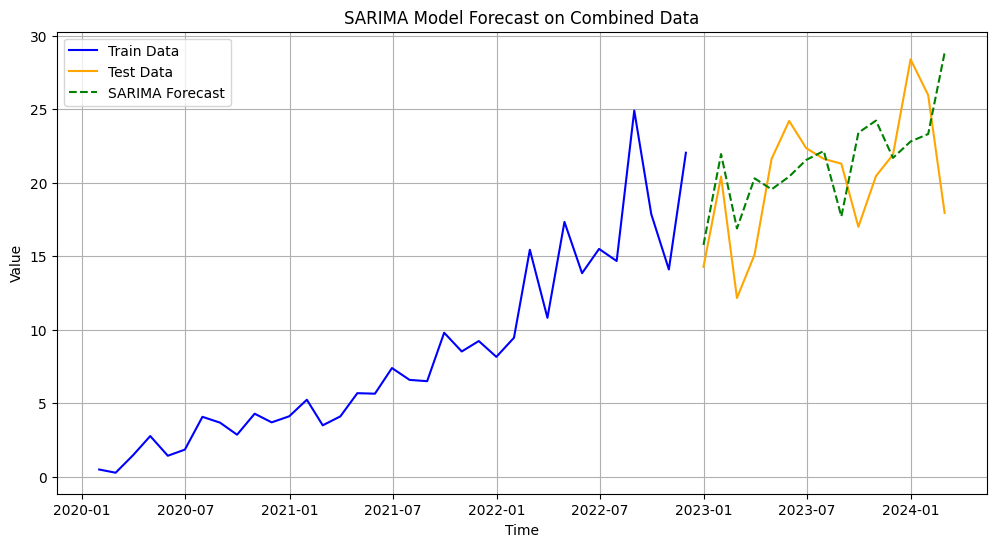

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Объединение train и test данных в один временной ряд
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

# Создаём временной ряд
time_series = pd.Series(data=y, index=pd.date_range(start='2020-01-01', periods=len(y), freq='M'))

# Делим на train и test (например, 70% для обучения)
train_size = int(len(time_series) * 0.7)
train = time_series[:train_size]
test = time_series[train_size:]

# Обучение SARIMA модели
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Прогноз на тестовый набор
forecast = sarima_result.forecast(steps=len(test))

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data', color='blue')
plt.plot(test, label='Test Data', color='orange')
plt.plot(forecast, label='SARIMA Forecast', color='green', linestyle='--')
plt.title("SARIMA Model Forecast on Combined Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


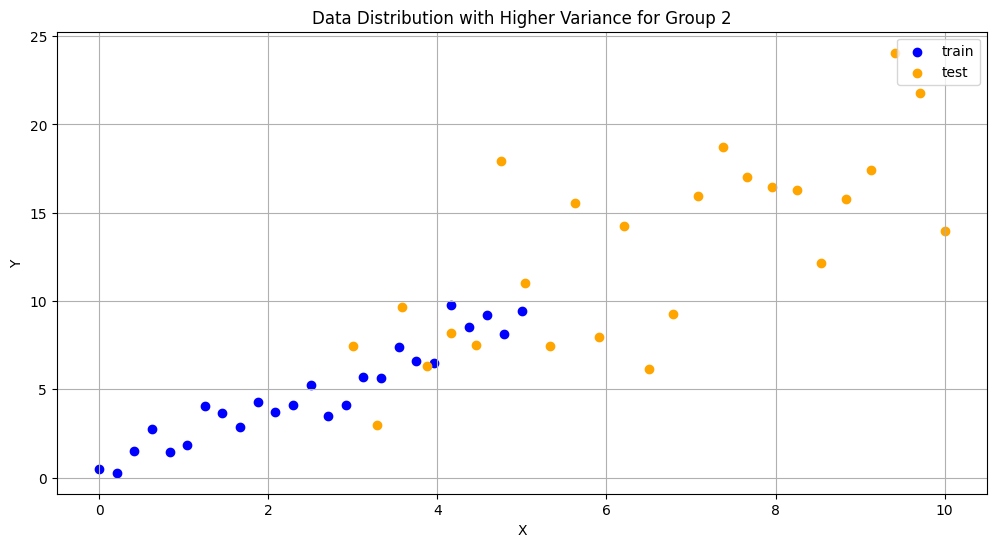

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Генерация данных с большей дисперсией
np.random.seed(42)

# Первая группа данных (синяя, без изменений)
X_train_1 = np.linspace(0, 5, 25)
y_train_1 = 2 * X_train_1 + np.random.normal(0, 1, len(X_train_1))

# Вторая группа данных (оранжевая, с увеличенной дисперсией)
X_test_1 = np.linspace(3, 10, 25)
y_test_1 = 2 * X_test_1 +1 + np.random.normal(0, 4, len(X_test_1))  # Стандартное отклонение увеличено до 3

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(X_train_1, y_train_1, color='blue', label='train')
plt.scatter(X_test_1, y_test_1, color='orange', label='test')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.title("Data Distribution with Higher Variance for Group 2")
plt.show()



In [ ]:
X_train_1

array([0.        , 0.20833333, 0.41666667, 0.625     , 0.83333333,
       1.04166667, 1.25      , 1.45833333, 1.66666667, 1.875     ,
       2.08333333, 2.29166667, 2.5       , 2.70833333, 2.91666667,
       3.125     , 3.33333333, 3.54166667, 3.75      , 3.95833333,
       4.16666667, 4.375     , 4.58333333, 4.79166667, 5.        ])

In [ ]:
X_test_1

array([ 3.        ,  3.29166667,  3.58333333,  3.875     ,  4.16666667,
        4.45833333,  4.75      ,  5.04166667,  5.33333333,  5.625     ,
        5.91666667,  6.20833333,  6.5       ,  6.79166667,  7.08333333,
        7.375     ,  7.66666667,  7.95833333,  8.25      ,  8.54166667,
        8.83333333,  9.125     ,  9.41666667,  9.70833333, 10.        ])

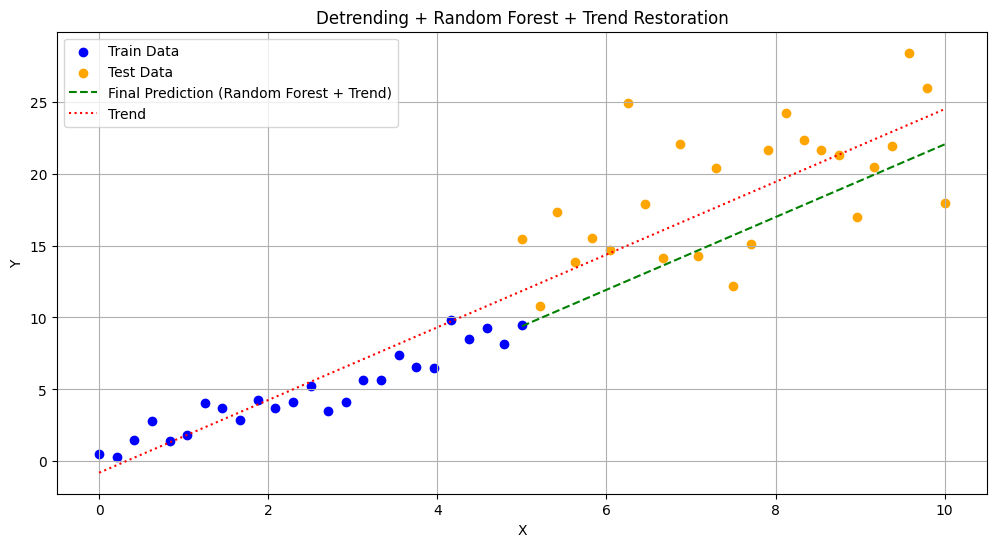

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(42)
X_train = np.linspace(0, 5, 25)
y_train = 2 * X_train + np.random.normal(0, 1, len(X_train))
X_test = np.linspace(5, 10, 25)
y_test = 2 * X_test + 5 + np.random.normal(0, 4, len(X_test))

# Объединение данных для тренда
X_full = np.concatenate([X_train, X_test])
y_full = np.concatenate([y_train, y_test])

# Обучение линейной регрессии для тренда
trend_model = LinearRegression()
trend_model.fit(X_full.reshape(-1, 1), y_full)

# Вычисление тренда
trend_train = trend_model.predict(X_train.reshape(-1, 1))
trend_test = trend_model.predict(X_test.reshape(-1, 1))

# Вычитание тренда (детрендинг)
y_train_detrended = y_train - trend_train

# Обучение Random Forest на остатках
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train.reshape(-1, 1), y_train_detrended)

# Прогноз остатков и восстановление полного предсказания
residuals_pred = rf_model.predict(X_test.reshape(-1, 1))
final_prediction = residuals_pred + trend_test

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_test, final_prediction, color='green', label='Final Prediction (Random Forest + Trend)', linestyle='--')
plt.plot(X_full, trend_model.predict(X_full.reshape(-1, 1)), color='red', label='Trend', linestyle=':')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Detrending + Random Forest + Trend Restoration")
plt.legend()
plt.grid(True)
plt.show()



Mean Squared Error after Box-Cox transformation: 113.2265


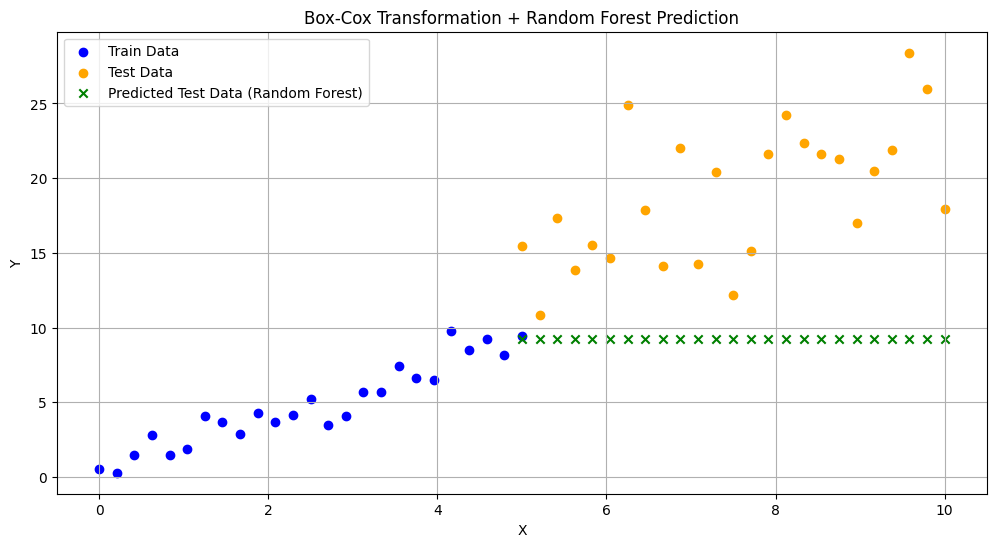

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import numpy as np

# Генерация данных
np.random.seed(42)
X_train = np.linspace(0, 5, 25).reshape(-1, 1)  # Преобразование в 2D массив
y_train = 2 * X_train.flatten() + np.random.normal(0, 1, len(X_train))
X_test = np.linspace(5, 10, 25).reshape(-1, 1)
y_test = 2 * X_test.flatten() + 5 + np.random.normal(0, 4, len(X_test))

# Преобразование данных с помощью Box-Cox
y_train_boxcox, lambda_train = boxcox(y_train + 6)  # Смещение для положительности
y_test_boxcox = boxcox(y_test + 6, lmbda=lambda_train)

# Обучение Random Forest на преобразованных данных
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_boxcox)

# Прогноз с использованием Random Forest
y_test_boxcox_pred = rf_model.predict(X_test)

# Обратное преобразование Box-Cox
y_test_pred = (y_test_boxcox_pred * lambda_train + 1) ** (1 / lambda_train) - 6

# Оценка модели
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error after Box-Cox transformation: {mse:.4f}")

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.scatter(X_test, y_test_pred, color='green', label='Predicted Test Data (Random Forest)', marker='x')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Box-Cox Transformation + Random Forest Prediction")
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error after Differencing and Inverse Transformation: 80.9468


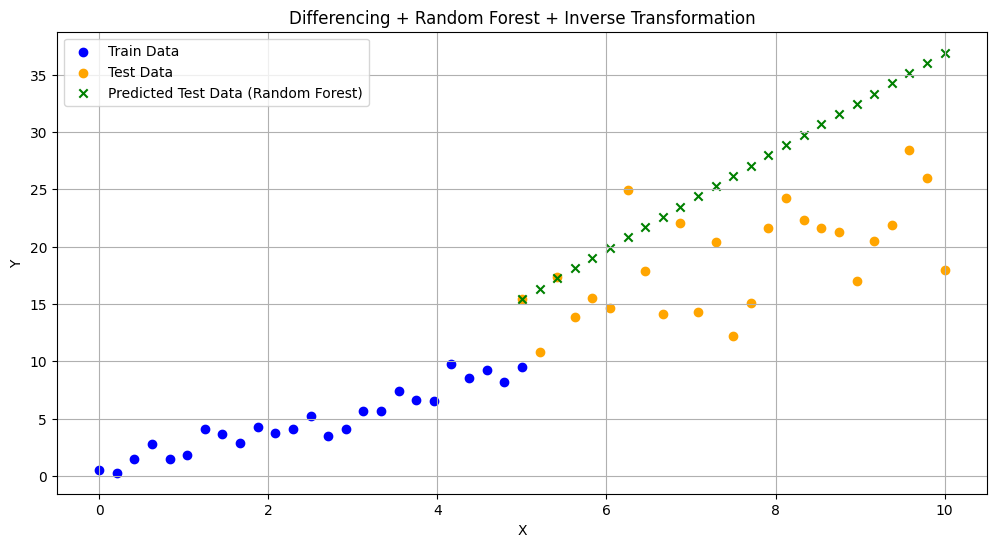

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Генерация данных
np.random.seed(42)
X_train = np.linspace(0, 5, 25).reshape(-1, 1)  # Преобразование в 2D массив
y_train = 2 * X_train.flatten() + np.random.normal(0, 1, len(X_train))
X_test = np.linspace(5, 10, 25).reshape(-1, 1)
y_test = 2 * X_test.flatten() + 5 + np.random.normal(0, 4, len(X_test))

# Дифференцирование (вычитание предыдущего значения)
y_train_diff = np.diff(y_train, prepend=y_train[0])
y_test_diff = np.diff(y_test, prepend=y_test[0])

# Обучение Random Forest на дифференцированных данных
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_diff)

# Прогнозирование
y_test_diff_pred = rf_model.predict(X_test)

# Обратное преобразование (кумулятивное суммирование)
y_test_pred = np.cumsum(y_test_diff_pred) + (y_test[0] - y_test_diff_pred[0])

# Оценка модели
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error after Differencing and Inverse Transformation: {mse:.4f}")

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.scatter(X_test, y_test_pred, color='green', label='Predicted Test Data (Random Forest)', marker='x')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Differencing + Random Forest + Inverse Transformation")
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error after Differencing X and y: 14.4047


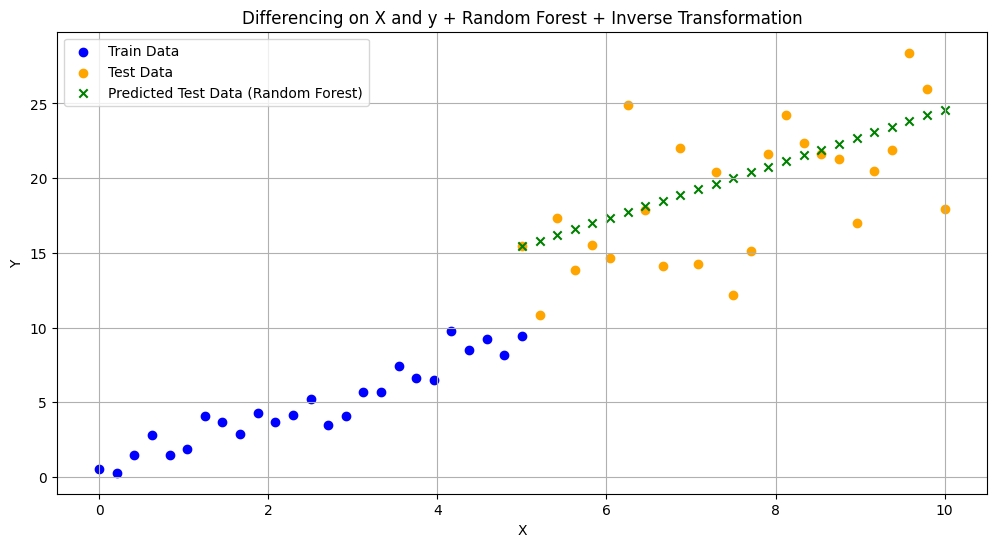

In [ ]:
# Дифференцирование X и y для тренировочных данных
X_train_diff = np.diff(X_train.flatten(), prepend=X_train[0])
y_train_diff = np.diff(y_train, prepend=y_train[0])

# Дифференцирование X для тестовых данных
X_test_diff = np.diff(X_test.flatten(), prepend=X_test[0])

# Преобразование в 2D массивы для обучения
X_train_diff = X_train_diff.reshape(-1, 1)
X_test_diff = X_test_diff.reshape(-1, 1)

# Обучение Random Forest на дифференцированных X и y
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_diff, y_train_diff)

# Прогнозирование на дифференцированных X
y_test_diff_pred = rf_model.predict(X_test_diff)

# Обратное преобразование (кумулятивное суммирование)
y_test_pred = np.cumsum(y_test_diff_pred) + (y_test[0] - y_test_diff_pred[0])

# Оценка модели
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error after Differencing X and y: {mse:.4f}")

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.scatter(X_test, y_test_pred, color='green', label='Predicted Test Data (Random Forest)', marker='x')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Differencing on X and y + Random Forest + Inverse Transformation")
plt.legend()
plt.grid(True)
plt.show()


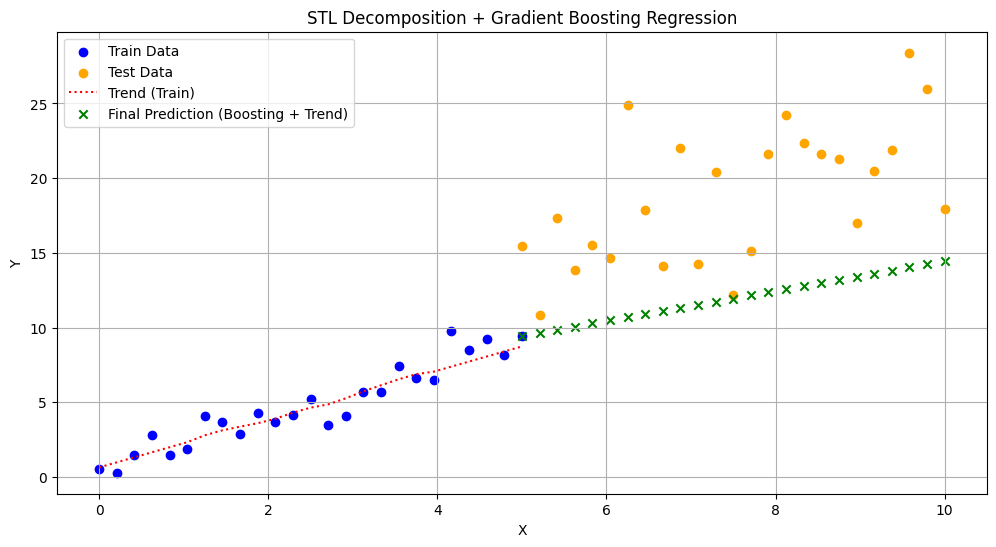

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(42)
X_train = np.linspace(0, 5, 25).reshape(-1, 1)  # Преобразование в 2D массив
y_train = 2 * X_train.flatten() + np.random.normal(0, 1, len(X_train))
X_test = np.linspace(5, 10, 25).reshape(-1, 1)
y_test = 2 * X_test.flatten() + 5 + np.random.normal(0, 4, len(X_test))

# Переход к одномерному временному ряду для STL-декомпозиции
y_train_series = np.ravel(y_train)

# STL-декомпозиция (работает с одномерными временными рядами)
result = seasonal_decompose(y_train_series, model='additive', period=12, extrapolate_trend='freq')
trend = result.trend  # Трендовая компонента
residual = y_train_series - trend  # Остатки

# Обучение бустинга на остатках
valid_indices = ~np.isnan(trend)  # Учитываем только значения, где тренд не NaN
model = GradientBoostingRegressor()
model.fit(X_train[valid_indices], residual[valid_indices])

# Прогноз остатков на тестовом наборе
residual_pred = model.predict(X_test)

# Восстановление финального прогноза
trend_test = np.linspace(trend[-1], trend[-1] + (X_test[-1] - X_test[0]).flatten()[0], len(X_test))
final_pred = residual_pred + trend_test

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_train, trend, color='red', label='Trend (Train)', linestyle=':')
plt.scatter(X_test, final_pred, color='green', label='Final Prediction (Boosting + Trend)', marker='x')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("STL Decomposition + Gradient Boosting Regression")
plt.legend()
plt.grid(True)
plt.show()


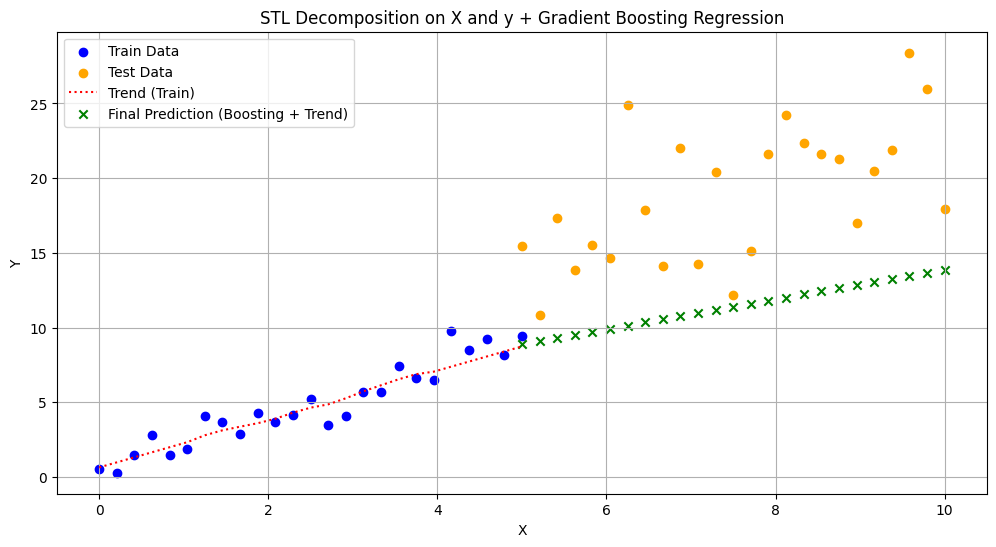

In [ ]:
# STL-декомпозиция для X_train
X_train_series = np.ravel(X_train)
result_X = seasonal_decompose(X_train_series, model='additive', period=12, extrapolate_trend='freq')
trend_X = result_X.trend  # Трендовая компонента для X
residual_X = X_train_series - trend_X  # Остатки для X

# STL-декомпозиция для y_train
y_train_series = np.ravel(y_train)
result_y = seasonal_decompose(y_train_series, model='additive', period=12, extrapolate_trend='freq')
trend_y = result_y.trend  # Трендовая компонента для y
residual_y = y_train_series - trend_y  # Остатки для y

# Убираем NaN из трендов
valid_indices = ~np.isnan(trend_X) & ~np.isnan(trend_y)

# Обучение бустинга на остатках X и y
model = GradientBoostingRegressor()
model.fit(residual_X[valid_indices].reshape(-1, 1), residual_y[valid_indices])

# Прогноз остатков для тестовых данных
X_test_series = np.ravel(X_test)
trend_X_test = np.linspace(trend_X[-1], trend_X[-1] + (X_test_series[-1] - X_test_series[0]), len(X_test))
residual_X_test = X_test_series - trend_X_test  # Остатки для X_test
residual_y_test_pred = model.predict(residual_X_test.reshape(-1, 1))  # Предсказание остатков

# Восстановление финального прогноза
trend_y_test = np.linspace(trend_y[-1], trend_y[-1] + (X_test_series[-1] - X_test_series[0]), len(X_test))
final_pred = residual_y_test_pred + trend_y_test

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_train, trend_y, color='red', label='Trend (Train)', linestyle=':')
plt.scatter(X_test, final_pred, color='green', label='Final Prediction (Boosting + Trend)', marker='x')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("STL Decomposition on X and y + Gradient Boosting Regression")
plt.legend()
plt.grid(True)
plt.show()
